In [1]:
import gc
import sys
import cv2
import progressbar as pb
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from common import *

In [2]:
# Set File Name
fileName = "csi_noa_1.csv"

In [3]:
# Load CSV & Calculate necessary frames
print("[1/4] Loading CSV ( " + fileName + " ) ...")
nx = getNx(fileName)
print("[2/4] Calculating necessary frames...")
frameIdx = getNecessaryFrameIdx(nx)
frameLen = len(frameIdx)

[1/4] Loading CSV ( csi_noa_1.csv ) ...
[2/4] Calculating necessary frames...


[3/4] Creating graphs and converting to cv format...


100% (771 of 771) |######################| Elapsed Time: 0:00:45 Time:  0:00:45


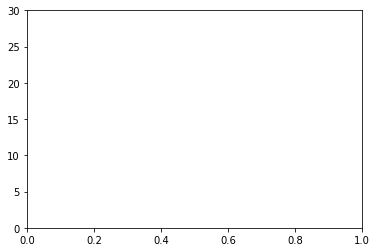

In [4]:
# Calculate graphs
print("[3/4] Creating graphs and converting to cv format...")
frames = []
barIdx = 0
plt.ylim(0, 30)
with pb.ProgressBar(max_value=frameLen) as bar:
    for p in frameIdx:
        pltLegend = []
        pltFigure = plt.figure()
        pltImage = BytesIO()
        for i in range(0, int((nx.shape[1] - 1) / 60)):
            pltLegend.append(str(i + 1) + 'TR')
            pltPlot = plt.plot(nx[p, (1 + 30 * i):(31 + 30 * i)], figure=pltFigure)
        plt.xlabel('Subcarriers Group', figure=pltFigure)
        plt.ylabel('Amplitude CSI [db]', figure=pltFigure)
        pltFigure.legend(pltLegend)
        pltFigure.savefig(pltImage, format='png')
        plt.close(pltFigure)
        pltImage.seek(0)
        cvImage = cv2.imdecode(np.asarray(
            bytearray(pltImage.read()), dtype=np.uint8), cv2.IMREAD_COLOR)
        frames.append(cvImage)
        barIdx += 1
        bar.update(barIdx)

In [5]:
# Save as mp4 video
videoName = conf.VID_NAME.format(
    fileName[:fileName.index('.')], 'amplitude')
print("[4/4] Saving in " + videoName + " ...")
saveVideo(videoName, frames)

 25% (196 of 771) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:00

[4/4] Saving in csi_noa_1-amplitude.mp4 ...


100% (771 of 771) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
#Finished